In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os 
os.environ['OMP_NUM_THREADS'] = '1'

In [ ]:
data = pd.read_csv('seeds_dataset.csv', names = ['Area', 'perimeter','compactness','length of kernel','width of kernel','asymmetry coefficient','length of kernel groove'])

In [ ]:
data.head(3)

,Area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825


In [ ]:
data.tail(4)

,Area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063


In [ ]:
data.isnull().sum()

Area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
dtype: int64

In [ ]:
import seaborn as sns

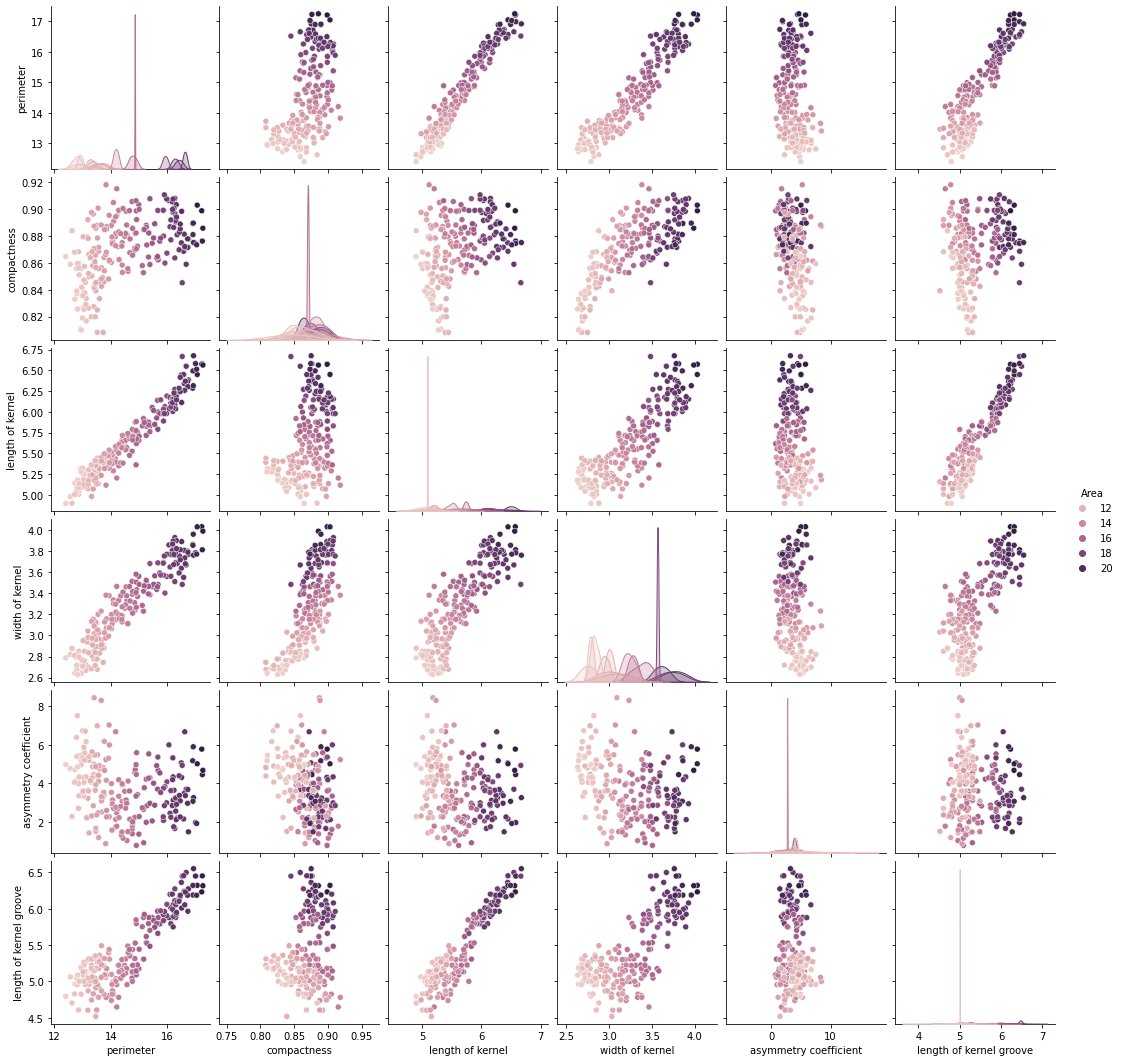

In [ ]:
sns.pairplot(data, hue="Area")

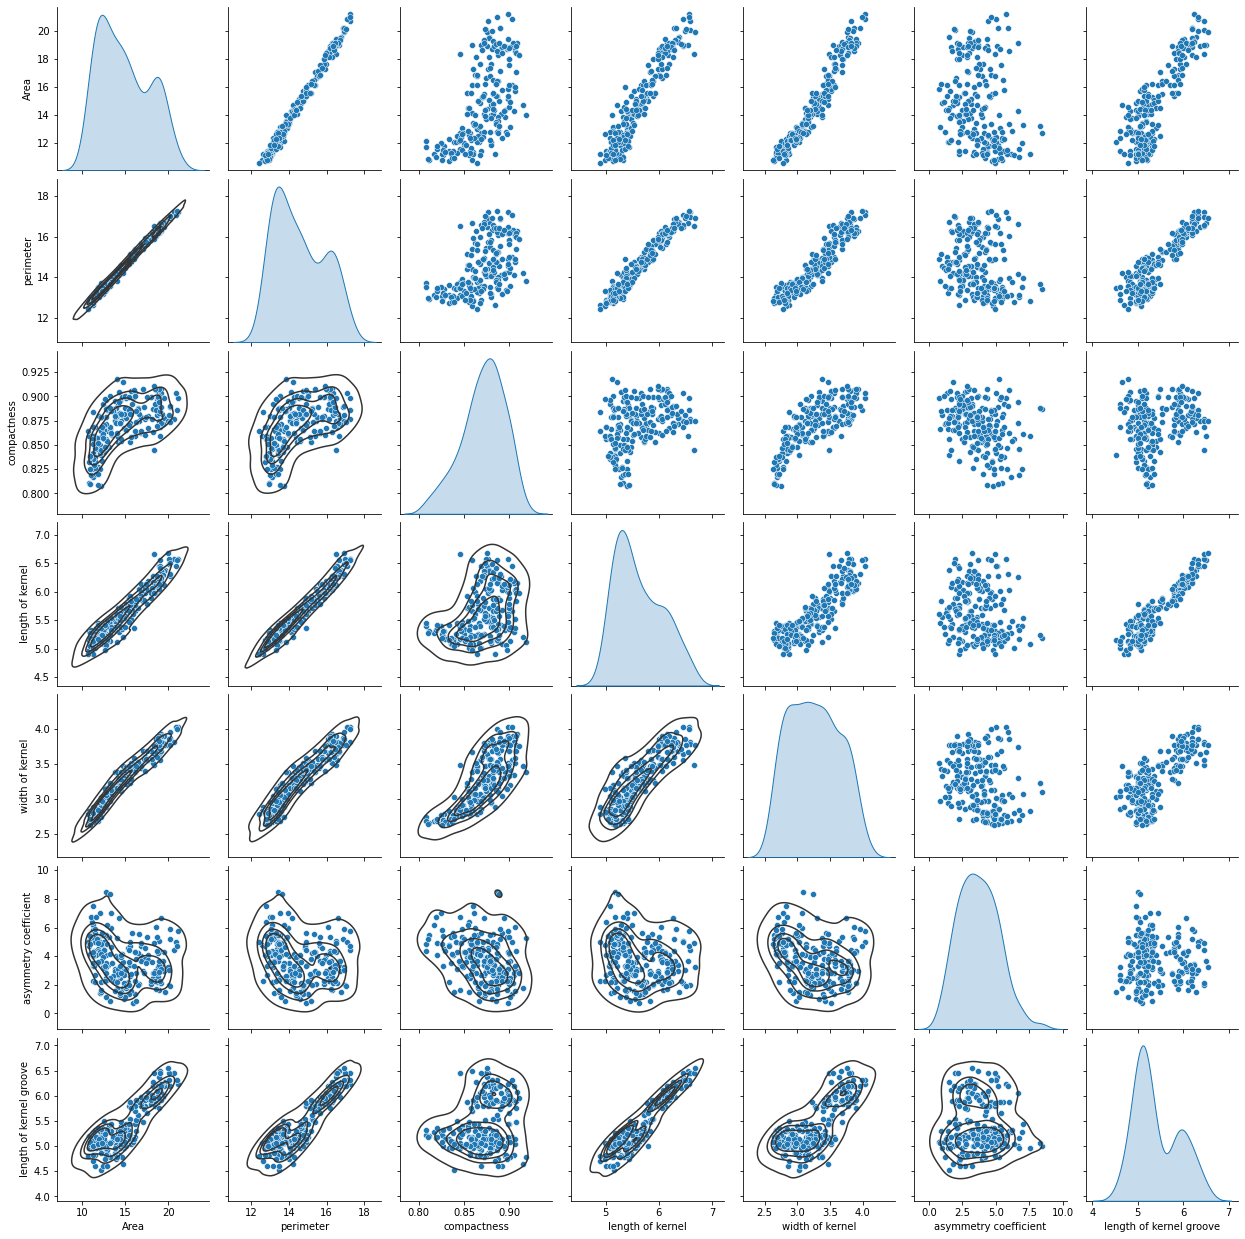

In [ ]:
explor = sns.pairplot(data, diag_kind="kde")
explor.map_lower(sns.kdeplot, levels=5, color="0.2")

In [ ]:
data['Area'].nunique()

193

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [ ]:
data.describe()

,Area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [ ]:
data.shape

(210, 7)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stan_sc = StandardScaler()

In [ ]:
X = data.iloc[:, 0:7].values

In [ ]:
X

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [ ]:
X = stan_sc.fit_transform(X)

In [ ]:
X

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

**In order to find the K value for k-means algorithum we use elbow method** 

In [ ]:
#elbow method is used to calculate the utilizeable culuster

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss1 = []
for i in range(1,12):
  kmeans =KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss1.append(kmeans.inertia_)


**For Visulization of Elbow**

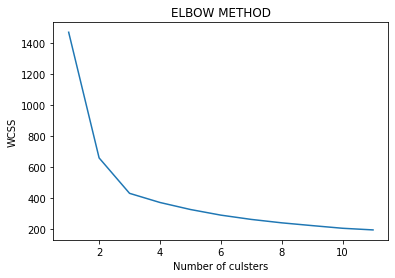

In [ ]:
plt.plot(range(1,12),wcss1)
plt.title('ELBOW METHOD')
plt.xlabel('Number of culsters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans =KMeans(n_clusters=3,init='k-means++',random_state=33)
y_kmeans = kmeans.fit_predict(X)

**In the aove dataset we have more then two features so we use PCA techniques to reduced the dementions**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pc = PCA(n_components=2)
X_reduced_dem = pc.fit_transform(X)

In [ ]:
pc.explained_variance_ratio_

array([0.71874303, 0.17108184])

In [ ]:
#total varience explain by the two demension
sum(pc.explained_variance_ratio_)

0.8898248618491238

In [ ]:
#Using matplotlib to visulizing the cluster 

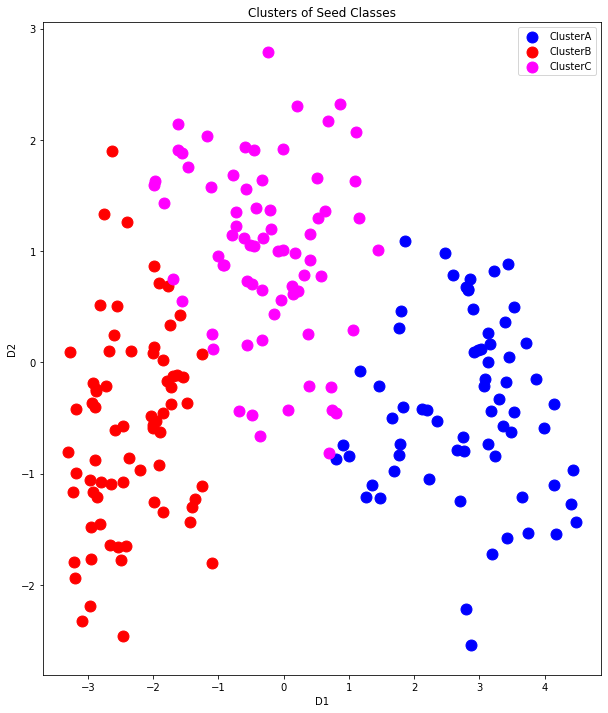

In [ ]:
plt.figure(figsize=(10,12))
plt.scatter(X_reduced_dem[y_kmeans == 0, 0], X_reduced_dem[y_kmeans == 0 , 1], s=120, c= 'blue', label = 'ClusterA')
plt.scatter(X_reduced_dem[y_kmeans == 1, 0], X_reduced_dem[y_kmeans == 1 , 1], s=120, c= 'red', label = 'ClusterB')
plt.scatter(X_reduced_dem[y_kmeans == 2, 0], X_reduced_dem[y_kmeans == 2 , 1], s=120, c= 'magenta', label = 'ClusterC')
plt.title('Clusters of Seed Classes')
plt.xlabel('D1')
plt.ylabel('D2')
plt.legend()
plt.show()

3D Graph

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)
X_reduced_dem = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.71874303, 0.17108184, 0.09685763])

In [ ]:
sum(pca.explained_variance_ratio_)



0.9866824959320446

In [ ]:
result=pd.DataFrame(pca.transform(X), columns=['D%i' % i for i in range(3)])

In [ ]:
result.head(1)

,D0,D1,D2
0,0.317047,0.783669,-0.63101


In [ ]:
import plotly.graph_objects as go
PLOT = go.Figure()

In [ ]:
PLOT.add_trace (go.Scatter3d( x=result['D0'],y = result['D1'], z = result['D2']))
PLOT.update_layout(scene = dict(xaxis_title='D1', yaxis_title='D2',zaxis_title='D3'),width=700,margin=dict(r=20, b=10, l=10, t=10))
                               

In [ ]:
#Part Two
import scipy.cluster.hierarchy as sch

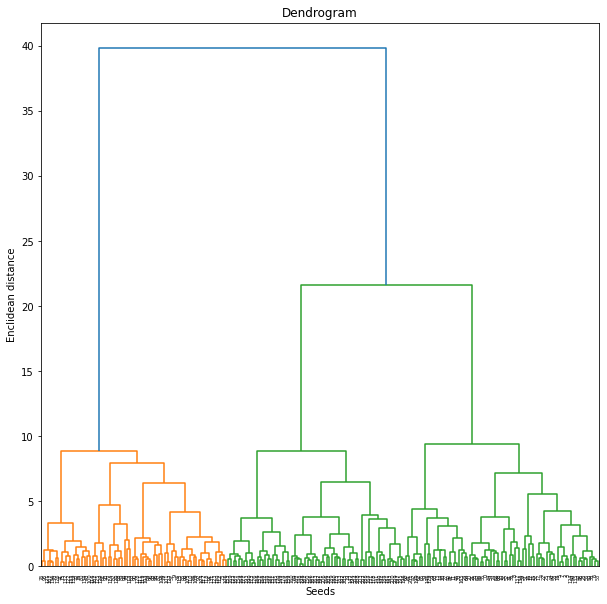

In [ ]:
plt.figure(figsize=(10,10))
dengrogram =  sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Seeds')
plt.ylabel('Enclidean distance')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward' )
y_hc = hc.fit_predict(X)

In [ ]:
pc = PCA(n_components=2)
X_reduced_dem1 = pc.fit_transform(X)

In [ ]:
pc.explained_variance_ratio_

array([0.71874303, 0.17108184])

In [ ]:
#total varience explain by the two demension
sum(pc.explained_variance_ratio_)

0.8898248618491238

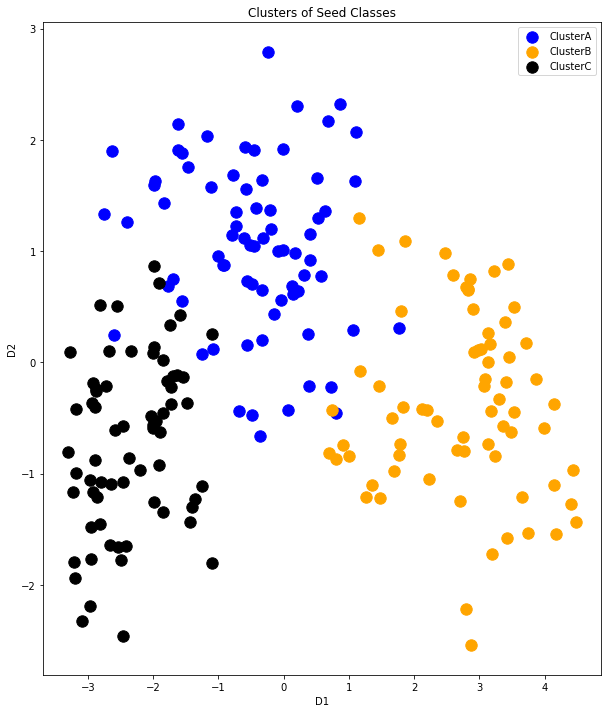

In [ ]:
plt.figure(figsize=(10,12))
plt.scatter(X_reduced_dem1[y_hc == 0, 0], X_reduced_dem1[y_hc == 0 , 1], s=130, c= 'blue', label = 'ClusterA')
plt.scatter(X_reduced_dem1[y_hc == 1, 0], X_reduced_dem1[y_hc == 1 , 1], s=130, c= 'orange', label = 'ClusterB')
plt.scatter(X_reduced_dem1[y_hc == 2, 0], X_reduced_dem1[y_hc == 2 , 1], s=130, c= 'black', label = 'ClusterC')
plt.title('Clusters of Seed Classes')
plt.xlabel('D1')
plt.ylabel('D2')
plt.legend()
plt.show()